In [1]:
import numpy as np

%load_ext autoreload 
%autoreload 2

data = np.load('../gesture_dataset.npz', allow_pickle=True)
X = data['X']  # gestures
y = data['y']  # labels
class_to_label = data['class_to_label'].item()  # convert from 0-d object to dict

In [2]:
print("Keys in the file:", data.files)
print("Number of gestures:", len(X))
print("Number of labels:", len(y))
print("Class mapping:", class_to_label)
X.shape

Keys in the file: ['X', 'y', 'class_to_label']
Number of gestures: 60
Number of labels: 60
Class mapping: {'checkmark': 0, 'circle': 1, 'line': 2, 'square': 3}


(60,)

<>:8: SyntaxWarning: invalid escape sequence '\g'
<>:8: SyntaxWarning: invalid escape sequence '\g'
C:\Users\gdyer\AppData\Local\Temp\ipykernel_77572\58889268.py:8: SyntaxWarning: invalid escape sequence '\g'
  gesture = load_gesture_xyz("..\gesture_dataset_RAW\checkmark\checkmark_20251128_195844_224.json")


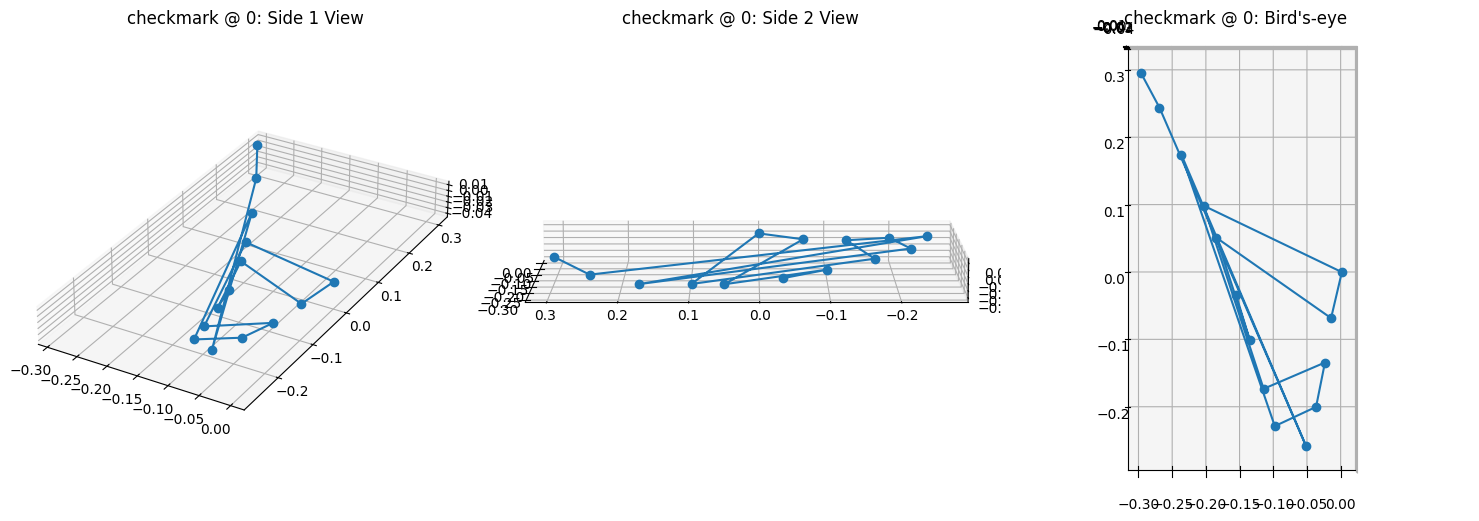

In [ ]:
import matplotlib.pyplot as plt
from raw_to_dataset import load_gesture_xyz

gesture_index = 0  # input idx to show here, each idx is a gesture


gesture = X[gesture_index]
# gesture = load_gesture_xyz("..\gesture_dataset_RAW\checkmark\checkmark_20251128_195844_224.json")

 
xs, ys, zs = zip(*gesture)

fig = plt.figure(figsize=(15, 5))


label = y[gesture_index]
class_name = [k for k,v in class_to_label.items() if v == label][0]


# --- Default angle ---
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot(xs, ys, zs, marker='o')
ax1.set_title(f"{class_name} @ {gesture_index}: Side 1 View")

# --- Behind view ---
ax2 = fig.add_subplot(132, projection='3d')
ax2.plot(xs, ys, zs, marker='o')
ax2.view_init(elev=10, azim=180)
ax2.set_title(f"{class_name} @ {gesture_index}: Side 2 View")

# --- Bird's-eye view ---
ax3 = fig.add_subplot(133, projection='3d')
ax3.plot(xs, ys, zs, marker='o')
ax3.view_init(elev=90, azim=-90)
ax3.set_title(f"{class_name} @ {gesture_index}: Bird's-eye")

ax1.set_aspect('equal', adjustable='box')
ax2.set_aspect('equal', adjustable='box')
ax3.set_aspect('equal', adjustable='box')

plt.tight_layout()
plt.show()

In [13]:
X[0]

[(0.0, 0.0, 0.0),
 (-0.01559072732925415, -0.06759810447692871, -0.006525754928588867),
 (-0.0245705246925354, -0.13275456428527832, -0.006530046463012695),
 (-0.03779226541519165, -0.1975393295288086, -0.00044846534729003906),
 (-0.05293095111846924, -0.2538790702819824, 0.004570484161376953),
 (-0.09822708368301392, -0.22619938850402832, -0.0066454410552978516),
 (-0.1145126223564148, -0.17202258110046387, -0.01911020278930664),
 (-0.13500529527664185, -0.1001276969909668, -0.03203082084655762),
 (-0.15505510568618774, -0.0346221923828125, -0.04122304916381836),
 (-0.1842479109764099, 0.05070638656616211, -0.044699668884277344),
 (-0.20340174436569214, 0.0983433723449707, -0.040735602378845215),
 (-0.23616546392440796, 0.17370343208312988, -0.03493058681488037),
 (-0.2678385376930237, 0.24203777313232422, -0.01522684097290039),
 (-0.2937009930610657, 0.29041481018066406, 0.014903545379638672)]

In [11]:
from raw_to_dataset import set_first_as_origin, sort_by_centroid, get_centroid

test_arr = [
    [0, 0, 0],
    [2, 0, 0],
    [2, -2, 0],
    [0, -2, 0]
]

test_arr = set_first_as_origin(test_arr)

# test_arr

test_arr = sort_by_centroid(test_arr)
print(get_centroid(test_arr))
test_arr

[ 1. -1.  0.]


[[0, 0, 0], [2, 0, 0], [2, -2, 0], [0, -2, 0]]